<a href="https://colab.research.google.com/github/phycem/Data-Science-Projects-and-Tasks/blob/main/Personal_Project_Disaster_Relief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Relief Project 
The data set for this project consists of tweets from people experiencing natural disasters around the world. The tweets are classified by category some are further classified by having some sort of need. 


Question : 
-why no leminization punctuation etc? There are words sentences in 'text'
-what makes the words notice they are similar? all the vocab has 300 vectors. text_to_nlp? is it just for cleaning? 
-I only found the similarities between words in the same table text. Should I look for similar words in a different place? I am mainly trying to detect if a random tweet belongs to a need or resource of water, food, energy, medicine, or none. Should I implement/create an algorithm? 


ANSWER:

just change the each table to one line with texts all combined using .join() 
then take each word vector sum the dimensions for each sentence then the whole table. 
finish doing this for all the tables and run it for a tweet and check which table matches the best. 



In [ ]:
#@title Starter libraries (double click to take a look) { display-mode: "form" }
# useful for opening files
import gdown
import zipfile

import os # accessing parts of your operating system
import re
import sys

# data visualization + manipulation -- we've seen these many times
import numpy as np
import pandas as pd

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.preprocessing import PolynomialFeatures # for polynomial model
from sklearn.pipeline import Pipeline

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# more sklearn model making
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from collections import Counter

# NLP
import string
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords' ,quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import wordcloud
import tweepy

# NN models
import tensorflow as tf
import tensorflow_datasets as tfds

import keras
from tensorflow.keras import layers , activations , models , preprocessing, utils

# sequence data
from keras import Input, Model
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.sequence import pad_sequences

# text
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.text import Tokenizer

# NN and CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
import keras.optimizers as optimizers
from keras.activations import softmax
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title Load your dataset { display-mode: "form" }
import pandas as pd
!wget -O ./disaster_data.csv 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Disaster%20Relief/disaster_data.csv'
dataset_path = './disaster_data.csv'
disaster_tweets = pd.read_csv('disaster_data.csv',encoding ="ISO-8859-1")

--2022-08-11 19:43:55--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Disaster%20Relief/disaster_data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236777 (231K) [text/csv]
Saving to: ‘./disaster_data.csv’

./disaster_data.csv 100%[===================>] 231.23K  --.-KB/s    in 0.002s  

2022-08-11 19:43:55 (96.9 MB/s) - ‘./disaster_data.csv’ saved [236777/236777]



put each vectorized table into the general vectorized and go through cosine (out of one) guesses the highest value.

In [ ]:
# This function prints out a table containing all the tweets, along with their category labels
disaster_tweets

,tweet_id,text,category,need_or_resource
0,ca9e24c8-396d-4502-8b45-18895df5333e_0,"Donations of batteries, flashlights, and clean...",Energy,need
1,twitter_resource_tweets_1692,I want hurricane Sandy to cone so I can be stu...,None,NaN
2,625b46e2-0b81-41ea-826e-4535fe9b39b8,"Hi, I can help prepare food, serve food, offer...",Food,resource
3,twitter_resource_tweets_1699,I cant believe Sandy.....,None,NaN
4,c3bfea72-d377-445c-b4b8-e8ebca0e7fbb,I have children and adult clothes including ja...,Water,resource
...,...,...,...,...
1396,4954cd07-1796-4841-a79a-9edf7faf9521,We were here for the marathon and would like t...,Food,resource
1397,425e0f7e-eebc-4bc7-9027-34b3298ee084,I am writing on behalf of friends stranded in ...,Medical,need
1398,twitter_need_tweets_4630,Finally at my Uncle's house in Brooklyn. Gonna...,None,NaN
1399,twitter_resource_tweets_2745,Two years in a raw... #Irene then #Sandy... Co...,None,NaN


vectorize this for next week word by word. To find what categories and need or resource there. 

for importing outside data

In [ ]:
#import os
#from google.colab import drive
#drive.mount('/content/drive')
#filepath = '/content/drive/My Drive/datauploadtest.csv'
#os.chdir(filepath)
#data = pd.read_csv("datauploadtest.csv")

In [ ]:
sorted=disaster_tweets.sort_values(['category','need_or_resource'])
Energy=sorted[sorted['category']=="Energy"]
Food=sorted[sorted['category']=="Food"]
Water=sorted[sorted['category']=="Water"]
Medical=sorted[sorted['category']=="Medical"]
Nonemade=sorted[sorted['category']=="None"]


In [ ]:
NeedMed=Medical[Medical['need_or_resource']=="need"]
ResourceMed= Medical[Medical['need_or_resource']=="resource"]
NeedWater= Water[Water['need_or_resource']=="need"]
ResourceWater= Water[Water['need_or_resource']=="resource"]
NeedEnergy= Energy[Energy['need_or_resource']=="need"]
ResourceEnergy= Energy[Energy['need_or_resource']=="resource"]
NeedFood= Food[Food['need_or_resource']=="need"]
ResourceFood= Food[Food['need_or_resource']=="resource"]
nonemaderesource=Nonemade[Nonemade['need_or_resource']=="resource"]
nonemadeNeed=Nonemade[Nonemade['need_or_resource']=="need"]

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
disaster_tweets['category'].unique()

array(['Energy', 'None', 'Food', 'Water', 'Medical'], dtype=object)

In [ ]:
NeedMed.drop(['category','need_or_resource'],axis=1)
ResourceMed.drop(['category','need_or_resource'],axis=1)
NeedWater.drop(['category','need_or_resource'],axis=1)
ResourceWater.drop(['category','need_or_resource'],axis=1)
NeedEnergy.drop(['category','need_or_resource'],axis=1)
ResourceEnergy.drop(['category','need_or_resource'],axis=1)
NeedFood.drop(['category','need_or_resource'],axis=1)
ResourceFood.drop(['category','need_or_resource'],axis=1)
nonemaderesource.drop(['category','need_or_resource'],axis=1)
nonemadeNeed.drop(['category','need_or_resource'],axis=1)

,tweet_id,text
933,e49dced4-9344-485e-87d2-542d3409a53b_1,Left vm with *********** ******** Work: *****...


In [ ]:
N=NeedMed.drop(['category','need_or_resource'],axis=1)
Medical_Need=N.assign(type='Medical Need')
RM=ResourceMed.drop(['category','need_or_resource'],axis=1)
Resource_Medical = RM.assign(type='Medical Resource')
NW=NeedWater.drop(['category','need_or_resource'],axis=1)
Need_Water = NW.assign(type='Water Need')
RW= ResourceWater.drop(['category','need_or_resource'],axis=1)
Resource_Water = RW.assign(type='Water Resource')
NE=NeedEnergy.drop(['category','need_or_resource'],axis=1)
Energy_Need= NE.assign(type='Energy Need')
RE=ResourceEnergy.drop(['category','need_or_resource'],axis=1)
Energy_Resource = RE.assign(type='Energy Resource')
NF=NeedFood.drop(['category','need_or_resource'],axis=1)
Food_Need = NF.assign(type='Food Need')
RF= ResourceFood.drop(['category','need_or_resource'],axis=1)
Food_Resource = RF.assign(type='Food Resource')
NR= nonemaderesource.drop(['category','need_or_resource'],axis=1)
No_Resource = NR.assign(type='No Resource')
NN=nonemadeNeed.drop(['category','need_or_resource'],axis=1)
No_Need = NN.assign(type='No Need')



In [ ]:
No_Need

,tweet_id,text,type
933,e49dced4-9344-485e-87d2-542d3409a53b_1,Left vm with *********** ******** Work: *****...,No Need


In [ ]:
X9_train, X9_test, y9_train, y9_test = train_test_split(No_Need['text'], No_Need['type'], test_size=0.2, random_state=9)

In [ ]:
X8_train, X8_test, y8_train, y8_test = train_test_split(No_Resource['text'], No_Resource['type'], test_size=0.8, random_state=9)
train_No_Resource=' '.join(list(X8_train))

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(Food_Resource['text'], Food_Resource['type'], test_size=0.8, random_state=9)
train_Food_Resource=' '.join(list(X7_train))

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(Food_Need['text'], Food_Need['type'], test_size=0.8, random_state=9)
train_Food_Need=' '.join(list(X6_train))

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(Energy_Resource['text'], Energy_Resource['type'], test_size=0.8, random_state=9)
train_Energy_Resource=' '.join(list(X5_train))

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(Energy_Need['text'], Energy_Need['type'], test_size=0.8, random_state=9)
train_Energy_Need=' '.join(list(X4_train))

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(Resource_Water['text'], Resource_Water['type'], test_size=0.8, random_state=9)
train_Water_Resource=' '.join(list(X3_train))

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(Need_Water['text'], Need_Water['type'], test_size=0.8, random_state=9)
train_Water_Need=' '.join(list(X2_train))

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(Resource_Medical['text'], Resource_Medical['type'], test_size=0.8, random_state=9)
train_Med_Resource=' '.join(list(X1_train))

In [ ]:
 
X_train, X_test, y_train, y_test = train_test_split(Medical_Need['text'], Medical_Need['type'], test_size=0.8, random_state=9)
train_Med_Need=' '.join(list(X_train))

In [ ]:
thegroups=[MedNeed,MedResource,WaterNeed,WaterResource,EnergyNeed, EnergyResource, FoodNeed,FoodResource,NoResource]

In [ ]:
train_Water_Need

"Need a truck load of water (NOT DRINKING) to be able to start disinfecting home in Breezy Point. I have the cleaning service, but they cannot begin since there is no water in Breezy Point. need plumber to check furnace, and hot water heater after my basement was flooded out. 900' of garden hose to get water down Pier 9B to PortSide NewYork flooded supplies/space alongside the tanker MARY A. WHALEN. Ideally wanted by Saturday 11/17/12. Thank You!"

In [ ]:
train_Med_Need

"Going out to scavenge for allergy medicine. Hopefully someone is open otherwise my next painting with be splatter technique. #sandy Please donate clothes, tools, unopened over-the-counter medications Staying with grandmother at **************. Need to collect prescription meds. Car has no gas so can't get supplies. Also no money for re-supply. Gas would help, money would help, supplies would help. I am writing on behalf of friends stranded in Staten Island. A family of four from Bulgaria. The little girl (age 5) has an ear infection and the house is very cold. I would be grateful if someone could check on them and find a solution for them re housing, etc. until power is back. Thank you. \x89ÛÏ@Rockaway100: @redcrossny @fema Rockaway has been devastated and is in dire need of assistance with first aid supplies and basic necessities\x89Û\x9d We are looking for donations of feminine hygiene, toothpaste, DEODORANT has been a consistent request, & baby wipes PLEASE DONATE SOAP SHAMPOO TOOT

In [ ]:
v=gets_vectors('help')

In [ ]:
def vector_cosine_similarity(vec1):
  for vec2 in thegroups:
    #Assume vec1 and vec2 have the same size 
    numerator = 0
    for i in range(len(vec1)):
      numerator += vec1[i]*vec2[i]
    mag1 = (sum(elem**2 for elem in vec1))**0.5
    mag2 = (sum(elem**2 for elem in vec2))**0.5
    similarity = numerator/(mag1*mag2)
    print(similarity)
#print(vector_cosine_similarity(v))

Checking similarities between words and groups is more accurate to see the word accuracy. 

In [ ]:
print(vector_cosine_similarity(gets_vectors('hygiene')))

0.33961859576922443
0.30464565505900953
0.30143054430601196
0.422492898408123
0.24008013290990213
0.32509221300083985
0.39882281101511236
0.4420779133196649
0.34903304251181755
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('batteries'))) #agrees

0.19324545452705283
0.6203854558787842
0.6152406362494752
0.6256756332268326
0.6411207959386225
0.7047841213401729
0.5559003454772459
0.525595153386311
0.4365532148240121
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('power'))) #same as orders given at the plot

0.043057548972220784
0.3986928810929464
0.46077835833697317
0.4608560661190403
0.6399091168389727
0.43690226320080155
0.4765252503750059
0.398897743716337
0.41741532884939186
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('supplies'))) #here supplies is in third row on multiple groups after Medical Resource. 

0.2560396933533413
0.6763100179591218
0.6530736667662179
0.7457908042249026
0.6292645821605902
0.6934060729374264
0.7638542918614685
0.7328536407367017
0.5605842918857049
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('food'))) #agrees

0.2081855674267581
0.39432260587683216
0.459597319228479
0.5887700496132753
0.38052199273071746
0.4752329870306513
0.6228602702488121
0.7210857516919903
0.4210411445591278
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('tools'))) #totally agrees with the plots

0.3326031813243646
0.5323693979938334
0.4686811112159683
0.5603291396954609
0.5275091904446931
0.5836382840689317
0.5309706345780307
0.5653183527671516
0.7446061940173152
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('when')))

nan
nan
nan
nan
nan
nan
nan
nan
nan
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('collect'))) # collect is not even listed at Medical resource or Food resource but is more accurate than  in other groups listed frequently. 

0.13602405343849966
0.5100213332223361
0.42156378571179787
0.5218733986042088
0.46559560394917787
0.5218854002740404
0.5307204534608403
0.5683265534877127
0.4754818914239312
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('Need a truck load of water (NOT DRINKING) to be able to start disinfecting home in Breezy Point.	'))) #true!

0.35398090833933876
0.6944013145057457
0.911626158405042
0.8427516392396618
0.7979364204653085
0.7617694250090519
0.7612716525270931
0.7707716484496777
0.706752322720476
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('Basic tools, drill, etc.	'))) #true!

0.2783503257698568
0.49868193880889944
0.4045766289594256
0.48819219821452714
0.3779871047083524
0.5194717324159929
0.4063978629580659
0.4605490636767294
0.6410066899331396
None


In [ ]:
print(vector_cosine_similarity(gets_vectors('help')))  # even tho there are more help words in other groups, the most accurance of "help" is at Medical Need which is the second highest needed. Other groups have it on third line.

0.21801041211145566
0.3880186441634649
0.4350560027338432
0.5425525374682174
0.5493849907700754
0.4465917013839684
0.5468483690785972
0.5962032014386683
0.6989958998307721
None


In [ ]:
help => no resource    collect => food resource       tools => no resource    food => food resource    supplies => food need  power => energy need  batteries => energy resource
=> medical need            => medical resource            =>no resource         => food Food_Resource    => medical resource        =>energy need         =>energy resource

Medical need Need

In [ ]:
No_Resource

,tweet_id,text,type
592,068ceeaf-435c-48a6-bb8e-237e1fa64914,I missed the volunteer opportunity at astoria ...,No Resource
700,f35cee00-be95-44a0-b4bd-dcb78e891e8e,Some yard/hand tools.,No Resource
819,44fb4436-6fa0-44ca-b4ae-2fcc0d474c9d,I am not a professional but have experience wi...,No Resource
854,15ac2a91-84e9-4058-a887-8e613f05fb44,sculptor so reasonably handy with tools,No Resource
882,1a83a8b2-db45-41e2-9d80-d113788281d7,I have lots of hand and power tools as well as...,No Resource
929,3a74d9f6-c29f-4f5b-9ac9-6b72994a219f,I am happy to help with whatever kind of low-s...,No Resource
958,87d792a8-44b6-4c7b-8bbf-53a27968d1be,"i have a few power tools, circular saw, drill ...",No Resource
1006,23d32530-e6c6-426f-9aa5-eec51beb48ba,I would like to help clean-up,No Resource
1042,0e0ea1c6-e998-4736-96cc-16e3079ef2e6,rough carpentry hand and yard tools small pick...,No Resource
1047,7ff8c059-aaa2-4c54-8d64-c85d3f4d4737,"I have hand tools (hammer, nails, screws, scre...",No Resource


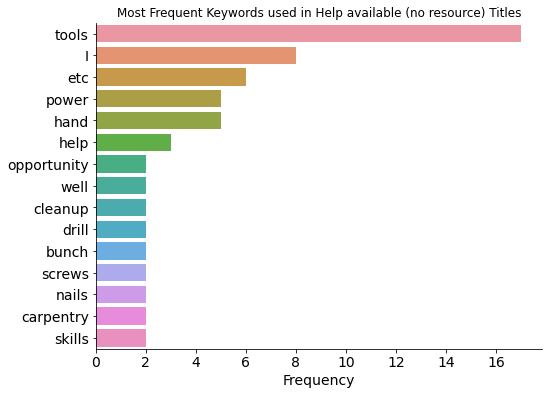

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(No_Resource['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Help available (no resource) Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

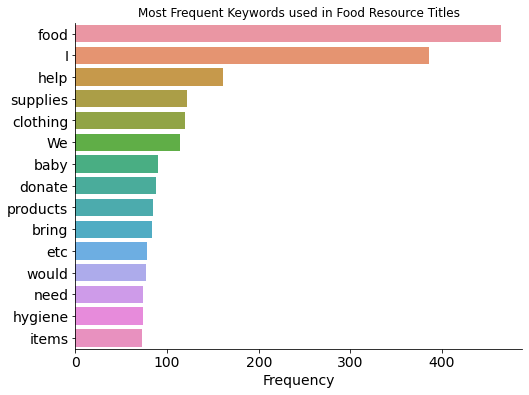

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Food_Resource['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Food Resource Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

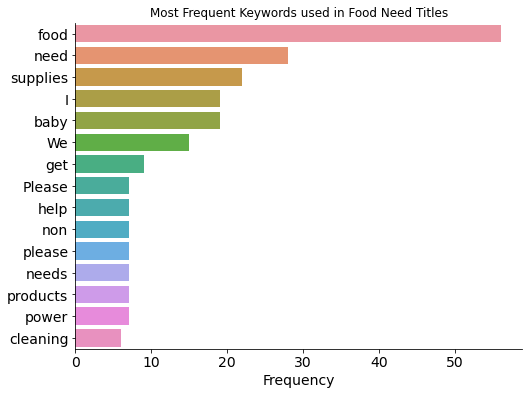

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Food_Need['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Food Need Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

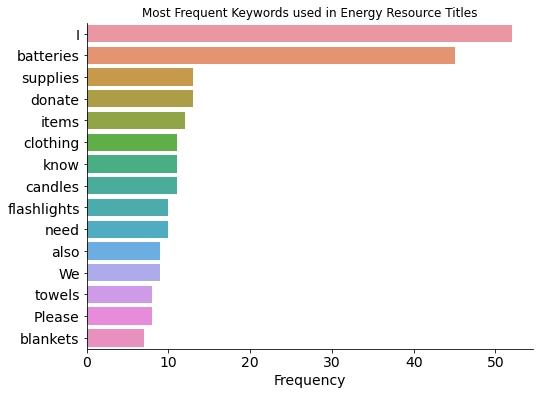

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Energy_Resource['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Energy Resource Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

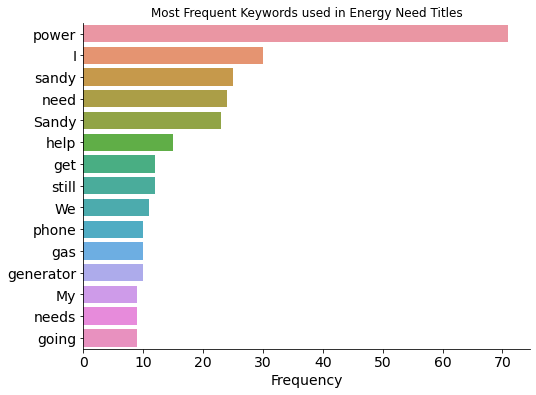

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Energy_Need['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Energy Need Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

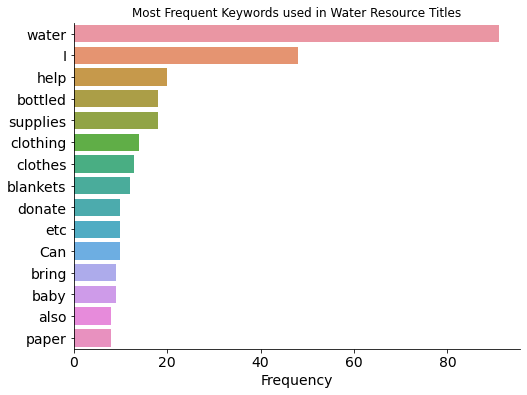

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Resource_Water['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Water Resource Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

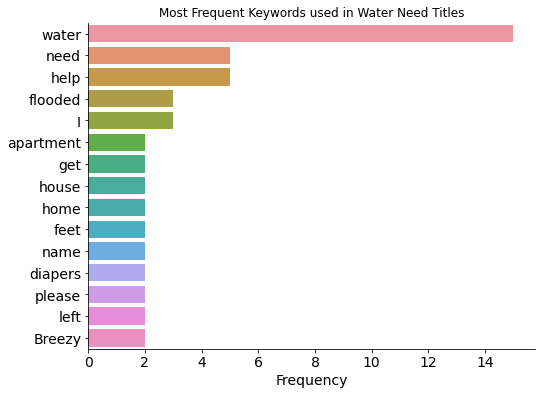

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Need_Water['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Water Need Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

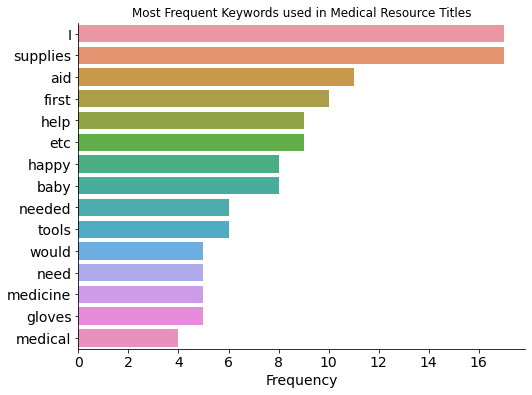

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Resource_Medical['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Medical Resource Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

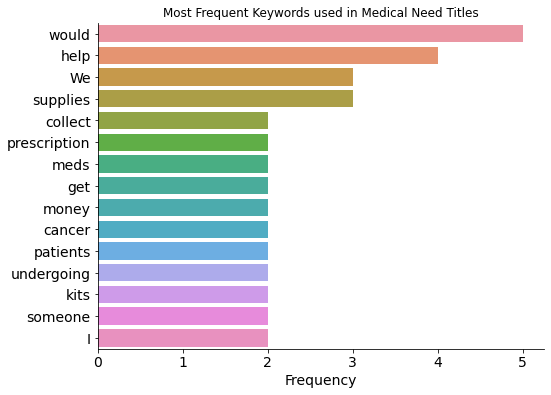

In [ ]:
from collections import Counter

stpwrds = stopwords.words('english')
punctuation = string.punctuation

# try changing to visualize more or less words
num_words = 15

# text cleaning maintaining all of our text as one string
text = " ".join(Medical_Need['text'])
# text = text.lower() # try adding this back in and see what happens!
text = "".join(_ for _ in text if _ not in punctuation)
text = [t for t in text.split() if t not in stpwrds and not t.isdigit()]

# We can use Counter to find the most frequent words in all our titles!
words = [_[0] for _ in Counter(text).most_common(num_words)]
frequency = [_[1] for _ in Counter(text).most_common(num_words)]

# Making our plot look nice!
plt.figure(figsize=(8,6));
ax = sns.barplot(x=frequency, y=words)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Most Frequent Keywords used in Medical Need Titles");
plt.xlabel("Frequency", fontsize=14);
plt.yticks(fontsize=14);
plt.xticks(fontsize=14);

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8,)
(8,)
(2,)
(2,)


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
!python -m spacy download en_core_web_md
import en_core_web_md

text_to_nlp = en_core_web_md.load() # loading in the model

2022-08-11 19:46:54.635926: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): 
          # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token)
    return np.array(clean_tokens)

In [ ]:
def gets_vectors(text):
  title = tokenize_vecs(text) # returns cleaned list of spacy tokens
  title_vec = [0]*300
  for word in title:
    title_vec += word.vector 
  return title_vec

In [ ]:
MedResource=gets_vectors(train_Med_Resource)

In [ ]:
EnergyNeed=gets_vectors(train_Energy_Need)

In [ ]:
WaterResource =gets_vectors(train_Water_Resource)

In [ ]:
WaterNeed=gets_vectors(train_Water_Need)

In [ ]:
MedNeed=gets_vectors(train_Med_Need)

In [ ]:
FoodNeed=gets_vectors(train_Food_Need)

In [ ]:
EnergyResource=gets_vectors(train_Energy_Resource)

In [ ]:
FoodResource=gets_vectors(train_Food_Resource)
NoResource=gets_vectors(train_No_Resource)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def process_lang_data(text):
  '''
    For a given text, go through the process of tokenizing, removing stopwords, 
    stemming / lemmatization, and removing punctuation. Return the cleaned text.
  '''
  cleaned_text = []
  punctuation = string.punctuation
  our_stopwords = stopwords.words('english')
  lemmatizer = WordNetLemmatizer()

  ### YOUR CODE HERE ###
  for token in word_tokenize(text):
    if token not in punctuation and token not in our_stopwords:
      #clipped_token = lemmatizer.lemmatize(token)
      cleaned_text.append(token)
  ### END YOUR CODE  ###

  return cleaned_text

In [ ]:
X_train

1044    Going out to scavenge for allergy medicine. Ho...
309     Please donate clothes, tools, unopened over-th...
253     Staying with grandmother at **************. Ne...
1397    I am writing on behalf of friends stranded in ...
316     ÛÏ@Rockaway100: @redcrossny @fema Rockaway ha...
124     We are looking for donations of feminine hygie...
603     PLEASE DONATE SOAP SHAMPOO TOOTHBRUSHES TOOTHP...
569     Deodorant Toothpaste Shampoo/Conditioner Baby ...
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # using the function we made above
bow.fit(X_train)                             # fitting to our training data
bow_train = bow.transform(X_train).toarray() # then transforming both training and testing data
bow_test = bow.transform(X_test).toarray()

In [ ]:
words = list(w2vec_model.wv.vocab)
print(words)


['We', 'looking', 'donations', 'feminine', 'hygiene', 'toothpaste', 'DEODORANT', 'consistent', 'request', 'baby', 'wipes', 'Staying', 'grandmother', 'Need', 'collect', 'prescription', 'meds', 'Car', 'gas', 'ca', "n't", 'get', 'supplies', 'Also', 'money', 're-supply', 'Gas', 'would', 'help', 'Please', 'donate', 'clothes', 'tools', 'unopened', 'over-the-counter', 'medications', '\x89ÛÏ', 'Rockaway100', 'redcrossny', 'fema', 'Rockaway', 'devastated', 'dire', 'need', 'assistance', 'first', 'aid', 'basic', 'necessities\x89Û\x9d', 'This', 'cancer', 'patients', 'undergoing', 'chemotherapy', 'displaced', 'storm', 'provide', 'chemo', 'kits', 'products', 'manage', 'side', 'effects', 'nausea', 'hair', 'loss', 'oral', 'care', 'issues', 'love', 'people', 'lost', 'much', 'already', 'difficult', 'time', 'Deodorant', 'Toothpaste', 'Shampoo/Conditioner', 'Baby', 'Shampoo', 'Kids', 'Toothbrush', 'Bar', 'Soap', 'Mouth', 'Wash', 'Q-tips', 'painkillers', 'PLEASE', 'DONATE', 'SOAP', 'SHAMPOO', 'TOOTHBRUSHES

In [ ]:
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()


2022-07-28 18:03:24.797338: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 2.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
for vec2 in list:
  print(sum(elem**2 for elem in vec2))

57370415.13505932
3152129.8175086416


In [ ]:
def vector_cosine_similarity(vec1):
  for vec2 in list:
    #Assume vec1 and vec2 have the same size 
    numerator = 0
    for i in range(len(vec1)):
      numerator += vec1[i]*vec2[i]
    mag1 = (sum(elem**2 for elem in vec1))**0.5
    mag2 = (sum(elem**2 for elem in vec2))**0.5
    similarity = numerator/(mag1*mag2)
    print(similarity)
#print(vector_cosine_similarity(v))

In [ ]:
print(vector_cosine_similarity(v))

0.44404507286072015
0.4356966519316163
None


In [ ]:
vocab_dict = dict()
vocab_dict

{}

In [ ]:
vocab_dict = dict() #initialize dictionary

for word in words:
    vocab_dict[word] = text_to_nlp(word).vector # What is the key? What is the value?

for word, vec in vocab_dict.items(): # Iterating through the dictionary to print each key and value
  print ('Word: {}. Vector length: {}'.format(word, len(vec)))

print()
print ('{} words in our dictionary'.format(len(words)))

Word: We. Vector length: 300
Word: looking. Vector length: 300
Word: donation. Vector length: 300
Word: feminine. Vector length: 300
Word: hygiene. Vector length: 300
Word: toothpaste. Vector length: 300
Word: DEODORANT. Vector length: 300
Word: consistent. Vector length: 300
Word: request. Vector length: 300
Word: baby. Vector length: 300
Word: wipe. Vector length: 300
Word: Staying. Vector length: 300
Word: grandmother. Vector length: 300
Word: Need. Vector length: 300
Word: collect. Vector length: 300
Word: prescription. Vector length: 300
Word: med. Vector length: 300
Word: Car. Vector length: 300
Word: gas. Vector length: 300
Word: ca. Vector length: 300
Word: n't. Vector length: 300
Word: get. Vector length: 300
Word: supply. Vector length: 300
Word: Also. Vector length: 300
Word: money. Vector length: 300
Word: re-supply. Vector length: 300
Word: Gas. Vector length: 300
Word: would. Vector length: 300
Word: help. Vector length: 300
Word: Please. Vector length: 300
Word: donate. 

In [ ]:
#@title Instructor Solution
def find_nearest_neighbor(word):
  try:
    vec = vocab_dict[word]
    find_most_similar(vec)
  except KeyError:
    print ('Word not in dictionary')

def find_most_similar(start_vec):
  #Should print the top 5 most similar words to start_vec, and their similarities.,
  #Hint: use a for loop to iterate through vocab_dict.
  #Consider using a Pandas series.

  #YOUR CODE HERE
  similarity_series = pd.Series(np.nan, index = vocab_dict.keys())
  for word, vec in vocab_dict.items():
    similarity_series[word] = vector_cosine_similarity(start_vec, vec)
  similarity_series = similarity_series[similarity_series.notna()] #get rid of N/A
  five_most_similar = similarity_series.sort_values().tail()
  print (five_most_similar) #words and similarities

find_nearest_neighbor('cancer')

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NeedEnergy["text"], NeedEnergy["need_or_resource"], test_size=0.2, random_state=9)

In [ ]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(1120,)
(1120,)
(281,)
(281,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # using the function we made above
bow.fit(X2_train)                             # fitting to our training data
bow_train = bow.transform(X2_train).toarray() # then transforming both training and testing data
bow_test = bow.transform(X2_test).toarray()

In [ ]:
import gensim
# have to pre-tokenize
tokenize = disaster_tweets["category"].apply(process_lang_data)

# take a look at the documentation to see what these parameters are changing!
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize, total_examples = len(disaster_tweets["category"]),epochs=20)

(1960, 28020)

In [ ]:
words1 = list(w2vec_model.wv.vocab)
print(words)


['Donations', 'battery', 'flashlight', 'cleaning', 'supply', 'always', 'welcome', 'donation', 'drop', '23-74', '38th', 'st', 'btwn', '23rd', 'ave', 'Astoria', 'Blvd', 'Thanks', 'I', 'want', 'hurricane', 'Sandy', 'cone', 'stuck', 'house', 'family', '..............', 'NOT', 'Hi', 'help', 'prepare', 'food', 'serve', 'offer', 'clean', 'assistance', "n't", 'necessarily', 'tool', 'hand', 'willingness', 'bicycle', 'could', 'maybe', 'delivery', "'m", 'within', 'walking', 'distance', 'Red', 'Hook', 'cant', 'believe', '.....', 'child', 'adult', 'clothes', 'including', 'jacket', 'blanket', 'shoe', 'bottle', 'water', 'two', 'small', 'would', 'like', 'donate', 'need', 'even', 'toy', 'kid', 'But', 'know', 'rather', 'red', 'cross', 'We', 'directly', 'advance', 'Melissa', 'Supermarket', 'scary', 'hurricanesandy', 'nopower', 'instahub', 'instafood', 'instagram', 'Super', 'Stop', 'Shop', 'http', '//t.co/hY0TRezH', 'spooky', 'total', 'lack', 'power', '34th', 'south', 'sandy', 'Will', 'storm', 'ever', 'gi

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(disaster_tweets["text"], disaster_tweets["need_or_resource"], test_size=0.2, random_state=9)

In [ ]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(1120,)
(1120,)
(281,)
(281,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(analyzer=process_lang_data, max_features=1000) # using the function we made above
bow.fit(X1_train)                             # fitting to our training data
bow_train = bow.transform(X1_train).toarray() # then transforming both training and testing data
bow_test = bow.transform(X1_test).toarray()

In [ ]:
import gensim
# have to pre-tokenize
tokenize = disaster_tweets["text"].apply(process_lang_data)

# take a look at the documentation to see what these parameters are changing!
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1)
w2vec_model.train(tokenize, total_examples = len(disaster_tweets["text"]),epochs=20)

(333193, 393240)

In [ ]:
words = list(w2vec_model.wv.vocab)
print(words)


['Donations', 'battery', 'flashlight', 'cleaning', 'supply', 'always', 'welcome', 'donation', 'drop', '23-74', '38th', 'st', 'btwn', '23rd', 'ave', 'Astoria', 'Blvd', 'Thanks', 'I', 'want', 'hurricane', 'Sandy', 'cone', 'stuck', 'house', 'family', '..............', 'NOT', 'Hi', 'help', 'prepare', 'food', 'serve', 'offer', 'clean', 'assistance', "n't", 'necessarily', 'tool', 'hand', 'willingness', 'bicycle', 'could', 'maybe', 'delivery', "'m", 'within', 'walking', 'distance', 'Red', 'Hook', 'cant', 'believe', '.....', 'child', 'adult', 'clothes', 'including', 'jacket', 'blanket', 'shoe', 'bottle', 'water', 'two', 'small', 'would', 'like', 'donate', 'need', 'even', 'toy', 'kid', 'But', 'know', 'rather', 'red', 'cross', 'We', 'directly', 'advance', 'Melissa', 'Supermarket', 'scary', 'hurricanesandy', 'nopower', 'instahub', 'instafood', 'instagram', 'Super', 'Stop', 'Shop', 'http', '//t.co/hY0TRezH', 'spooky', 'total', 'lack', 'power', '34th', 'south', 'sandy', 'Will', 'storm', 'ever', 'gi